In [1]:
# calling import library
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns    
# import Machinelearning library
from sklearn.linear_model import LogisticRegression #Alogr 1
from sklearn.svm import SVC  # Alogr 2
from sklearn.ensemble import RandomForestClassifier #Alogr 3
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score , accuracy_score  
from sklearn.metrics import roc_curve ,auc


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings 
warnings.filterwarnings("ignore")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
# Calling dataset
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# descriptive
df["diagnosis"].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

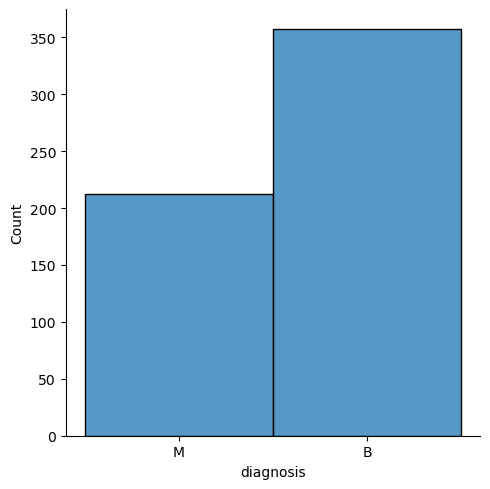

In [5]:
# histogram
sns.displot(df["diagnosis"])

In [6]:
df["diagnosis"] = df["diagnosis"].apply(lambda x:1 if x=="M" else 0)

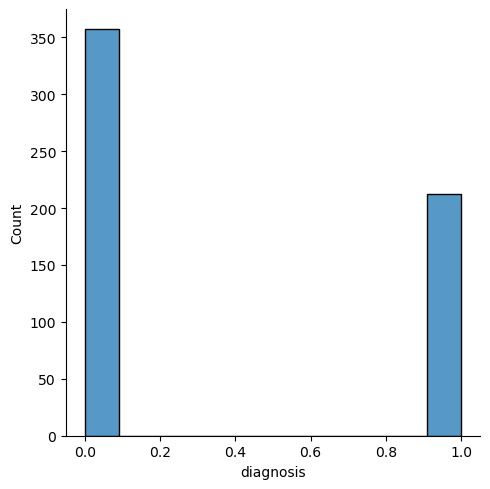

In [7]:
sns.displot(df["diagnosis"])

Correlation matrix

<Axes: >

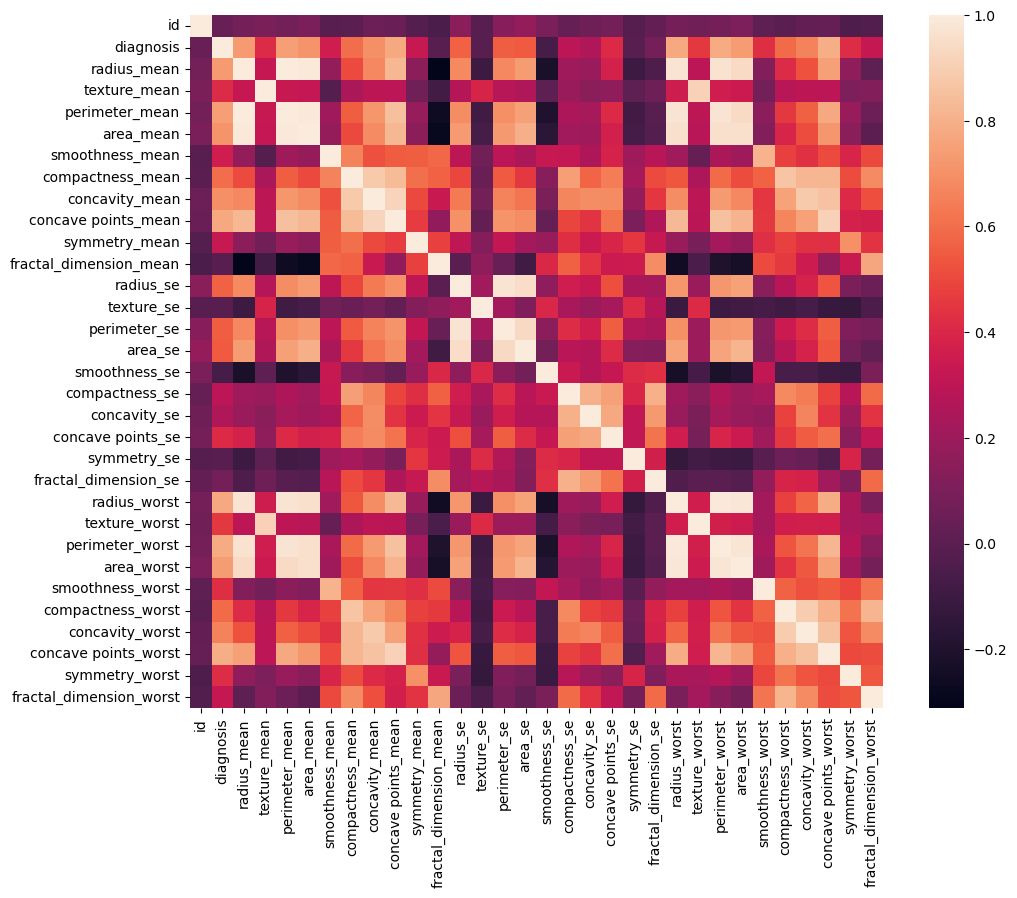

In [8]:
_df = df.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(_df, vmax=1, square=True)


In [9]:
df_col=['id','texture_mean','smoothness_mean','symmetry_mean',
       'fractal_dimension_mean','texture_se','smoothness_se','compactness_se', 
       'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se',
       'texture_worst','smoothness_worst','symmetry_worst']

for i in df_col:
    del df[i]

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: >

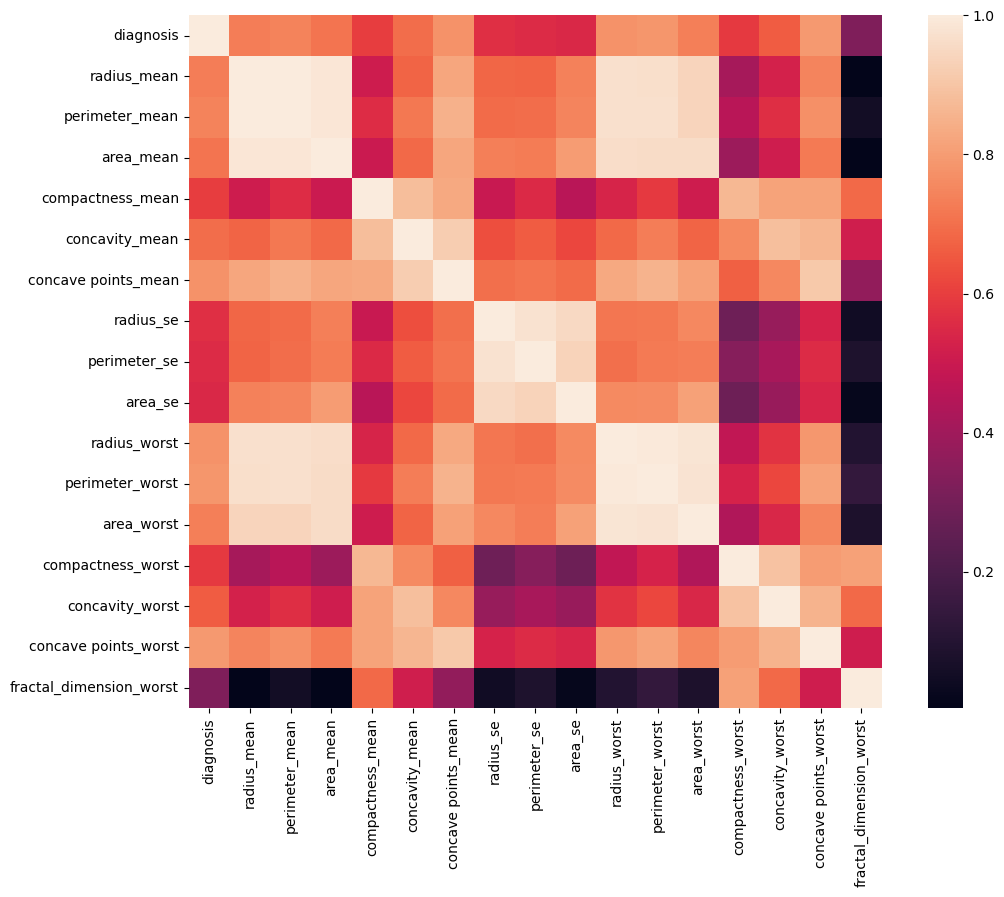

In [11]:
_df2 = df.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(_df2, vmax=1, square=True)


In [12]:
y = df['diagnosis']
X = df.loc[:,df.columns != 'diagnosis']
# ________splt_____________
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [13]:
_LG = LogisticRegression(solver="liblinear",random_state=42)
_SVM = SVC(kernel="linear",random_state=42)
_RF = RandomForestClassifier(n_estimators=300,random_state=42)

In [14]:
for i in (_LG,_SVM,_RF):
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print("Accuracy ({0})".format(i),accuracy_score(y_test , y_pred=y_pred))
    print("\t")
    print("F1_Score ({0})".format(i),f1_score(y_test,y_pred=y_pred))
    print("\t")

    

Accuracy (LogisticRegression(random_state=42, solver='liblinear')) 0.9883040935672515
	
F1_Score (LogisticRegression(random_state=42, solver='liblinear')) 0.9841269841269841
	
Accuracy (SVC(kernel='linear', random_state=42)) 0.9766081871345029
	
F1_Score (SVC(kernel='linear', random_state=42)) 0.9682539682539683
	
Accuracy (RandomForestClassifier(n_estimators=300, random_state=42)) 0.9590643274853801
	
F1_Score (RandomForestClassifier(n_estimators=300, random_state=42)) 0.944
	


In [15]:
y_pred_logistic = _LG.decision_function(X_test)
y_pred_svm = _SVM.decision_function(X_test)

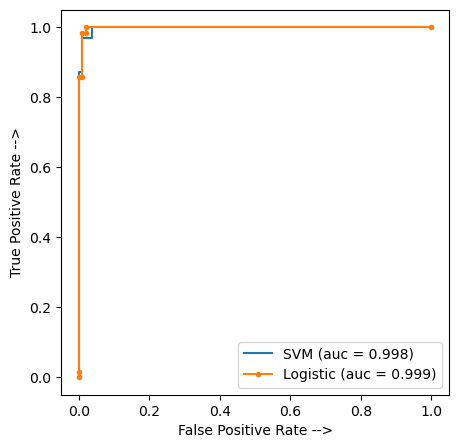

In [16]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()